<a href="https://colab.research.google.com/github/draculess99/Tensorflow2/blob/master/Section4_Convoluted_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0-alpha0'

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

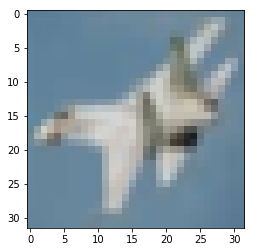

In [8]:
plt.imshow(X_test[10])

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
model.add(tf.keras.layers.Flatten())

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)             

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [36]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/2
50000/50000 [==============================] - 266s 5ms/sample - loss: 0.3322 - sparse_categorical_accuracy: 0.8843
Epoch 2/2
50000/50000 [==============================] - 264s 5ms/sample - loss: 0.2505 - sparse_categorical_accuracy: 0.9116


In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 14s 1ms/sample - loss: 0.9621 - sparse_categorical_accuracy: 0.7429


In [34]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7405999898910522
